# Flower Classification Project: Image-Based Classification Using Convolutional Neural Networks


This project aims to classify different flower species using Convolutional Neural Networks (CNNs). Flower classification has numerous applications in fields such as agriculture, horticulture, and plant biology. In this project, we will use a widely recognized dataset to create a model capable of accurately classifying various types of flowers based on image data.

Convolutional Neural Networks are powerful deep learning models particularly suited for image processing. They automatically learn features and can achieve high accuracy in visual tasks. Throughout this project, we'll focus on processing the data, training the model, and evaluating its accuracy.

Our goal is to create a model that can reliably classify flower images and demonstrate the power and flexibility of CNNs in automated visual recognition tasks.

## Data and Methods


In this project, a Convolutional Neural Network (CNN) is used to classify different types of flowers. The data was obtained from a Kaggle dataset, which contains a total of 4,242 images of flowers divided into five categories: daisies, tulips, roses, sunflowers, and dandelions. Each category contains approximately 800 images.

### About the Dataset


Source: Kaggle
Scope: 4,242 flower images
Flower Categories: Daisies, Tulips, Roses, Sunflowers, Dandelions
Number of Images: Approximately 800 images per category
Image Quality: About 320x240 pixels
Image Ratios: The images are not standardized to a single size, resulting in varying aspect ratios.
Data Collection Process
The dataset was compiled from sources like Flickr, Google Images, and Yandex Images. It is designed for identifying and classifying flowers in photographs.

### Methods


This project uses a Convolutional Neural Network (CNN) for flower classification. CNNs are deep learning algorithms that are particularly effective for image-based tasks, such as classification. The goal is to train a model that can accurately classify different types of flowers.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.layers import Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D
import random as rn
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   


## Preprocessing

To prepare the data for training and testing, we first need to load the images and their corresponding labels. We will resize all images to a consistent size of 150x150 pixels. The following code snippet shows the initial setup, including the image size and file paths for each flower category.

Here, we set up the following:

X: An empty list where we'll store image data.
Z: An empty list for the corresponding labels.
IMG_SIZE: A predefined size to which all images will be resized (150x150 pixels).
FLOWER_DAISY_DIR, FLOWER_SUNFLOWER_DIR, FLOWER_TULIP_DIR, FLOWER_DANDI_DIR, FLOWER_ROSE_DIR: These variables hold the file paths to the directories containing images of each respective flower category.

In [5]:
X=[]
Z=[]
IMG_SIZE=150
FLOWER_DAISY_DIR='flowers/daisy'
FLOWER_SUNFLOWER_DIR='flowers/sunflower'
FLOWER_TULIP_DIR='flowers/tulip'
FLOWER_DANDI_DIR='flowers/dandelion'
FLOWER_ROSE_DIR='flowers/rose'

### Label Assignment Function


To facilitate the labeling of images with their respective flower categories, we define a simple function assign_label. This function takes two parameters: img, representing the image, and flower_type, the label we want to assign. The function returns the label (flower type), allowing us to map each image to its correct category.

In [6]:
def assign_label(img,flower_type):
    return flower_type

### Function to Create Training Data


The make_train_data function is used to generate training data from a specific flower category directory. It takes two arguments: flower_type (the label for this category) and DIR (the directory path). The function processes all images in the specified directory, resizing them to IMG_SIZE x IMG_SIZE, assigning a label, and adding them to the X and Z lists.

In [8]:
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))
        
        

### Building the Training Dataset

The following code snippets use the make_train_data function to create training data for each flower category. This process involves reading images from specific directories, resizing them, and appending them to the X and Z lists.

In [9]:
make_train_data('Daisy',FLOWER_DAISY_DIR)
print(len(X))

100%|██████████| 764/764 [00:01<00:00, 494.64it/s]

764


In [10]:
make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
print(len(X))

100%|██████████| 733/733 [00:01<00:00, 412.69it/s]

1497


In [11]:
make_train_data('Dandelion',FLOWER_DANDI_DIR)
print(len(X))

100%|██████████| 1052/1052 [00:02<00:00, 485.03it/s]

2549


In [12]:
make_train_data('Rose',FLOWER_ROSE_DIR)
print(len(X))

100%|██████████| 784/784 [00:01<00:00, 511.96it/s]

3333


### Visualizing Sample Images


To get a visual understanding of our dataset, we can create a grid of subplots to display a sample of the flower images along with their labels. The following code snippet sets up a 5x2 grid (5 rows and 2 columns) and randomly selects images from the dataset to display in each subplot.

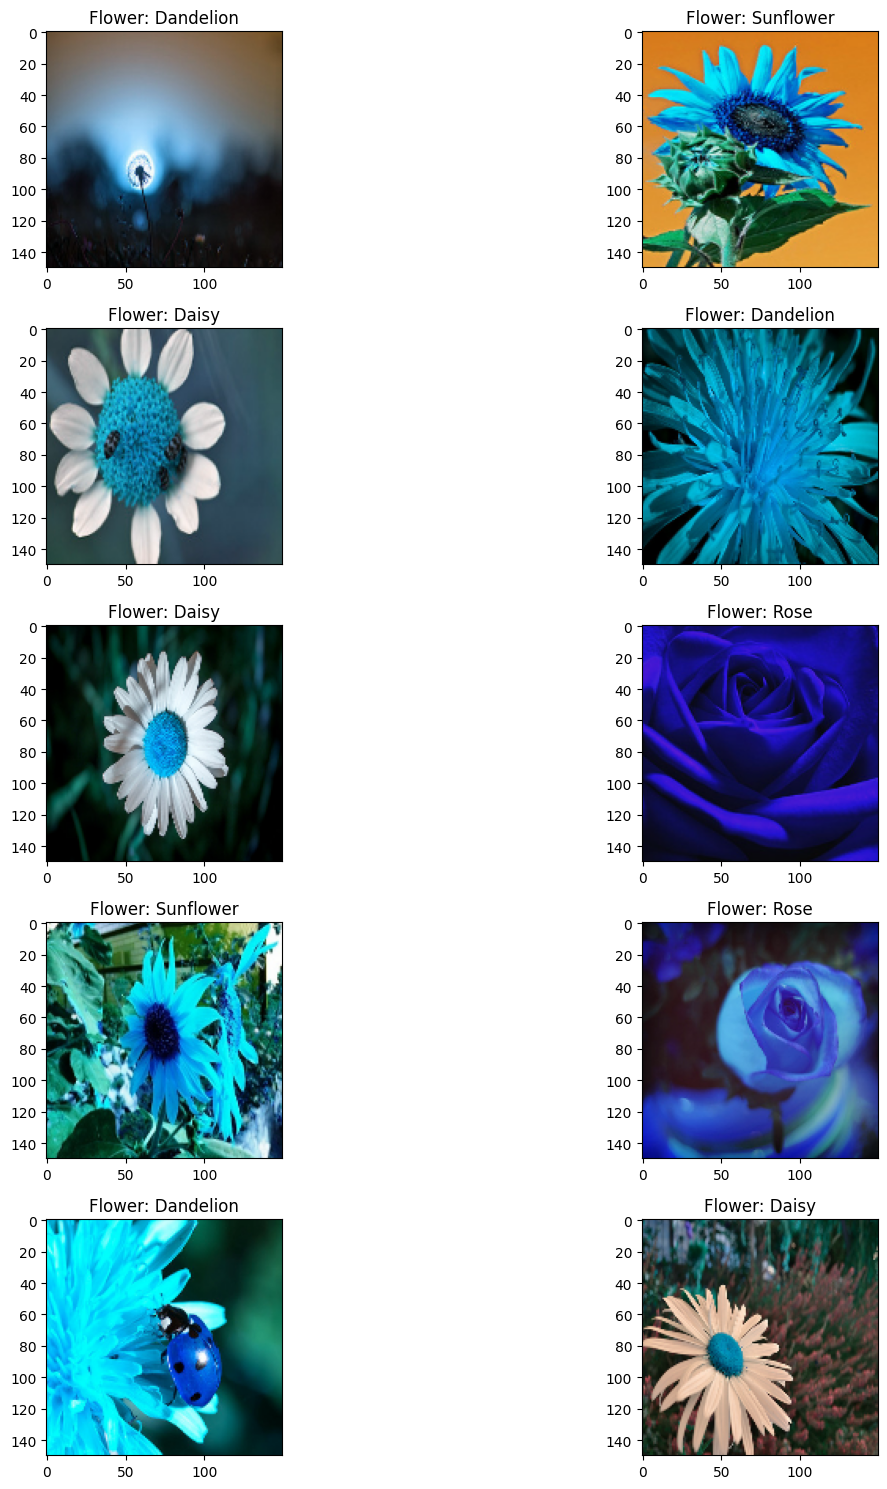

In [13]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])
        
plt.tight_layout()

### Encoding Labels and Normalizing Data


The first step involves encoding the flower category labels into a numerical format using LabelEncoder, followed by transforming the encoded labels into a one-hot format using to_categorical. Additionally, the image data is normalized by dividing by 255 to ensure values are between 0 and 1.

In [14]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255

### Splitting Data into Training and Testing Sets


The next step is to split the dataset into training and testing sets, with 25% of the data reserved for testing. This is done using train_test_split from sklearn.model_selection, with a random_state of 42 to ensure reproducibility.

In [15]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)


# Convolutional Neural Network (CNN) Architecture

To build the model for flower classification, we are using a Convolutional Neural Network (CNN) with the following architecture:

Convolutional Layers: The network includes four convolutional layers. These layers extract features from the input images using different kernel sizes.

First Conv Layer: 32 filters with a 5x5 kernel, using 'Same' padding and 'relu' activation. This layer includes input shape specification (150, 150, 3).

Second Conv Layer: 64 filters with a 3x3 kernel, also with 'Same' padding and 'relu' activation.

Third Conv Layer: 96 filters with a 3x3 kernel, 'Same' padding, and 'relu' activation.

Fourth Conv Layer: 96 filters with a 3x3 kernel, with the same padding and activation settings as the third layer.

Max Pooling Layers: After each convolutional layer, there's a Max Pooling operation to reduce the spatial dimensions.

Pooling Configuration: Pooling size of (2, 2), with strides of (2, 2) for each MaxPooling2D layer.

Flattening Layer: This layer flattens the 2D output of the previous layer into a 1D vector.

Dense Layers: Two dense (fully connected) layers are used to perform the final classification.

First Dense Layer: Contains 512 units with 'relu' activation.

Second Dense Layer: Contains 5 units, one for each flower category, with a 'softmax' activation function to output class probabilities.

In [16]:
# # modelling starts using a CNN.

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

c:\Users\Tunca\anaconda3\envs\bionlukk\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Model Training Configuration


To train the CNN model, we need to specify a few important parameters, including batch size, epochs, and callbacks for learning rate adjustment. Here's a breakdown:

Batch Size: Determines the number of training examples processed before updating the model's weights. A batch size of 64 is commonly used in deep learning tasks, balancing computational efficiency and training stability.
Epochs: Defines the number of times the training dataset is passed through the model. In this case, we set the number of epochs to 50, allowing the model to learn and improve over multiple iterations.
Learning Rate Reduction Callback: We use ReduceLROnPlateau from Keras to automatically reduce the learning rate when a specified metric (here, val_acc for validation accuracy) has stopped improving. This approach can help avoid overfitting and improve the model's generalization. The callback parameters are:
monitor: The metric to watch for improvements. We monitor val_acc (validation accuracy).
patience: The number of epochs to wait before reducing the learning rate if there's no improvement.
factor: The factor by which the learning rate is reduced. A factor of 0.1 reduces the learning rate by 90%.
verbose: Controls the verbosity of the callback. A value of 1 provides feedback on when the learning rate is reduced.

In [17]:
batch_size=64
epochs=50

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

# Data Augmentation with ImageDataGenerator


Data augmentation is used to increase the diversity of the training dataset by applying random transformations to the images. This technique helps the model generalize better to unseen data by introducing variations during training. The ImageDataGenerator class in Keras allows us to apply a range of augmentations to the training images.

Here's a summary of the data augmentation settings:

Rotation: Randomly rotate images by up to 10 degrees. This helps the model become invariant to small rotations.

Zoom: Apply a random zoom of up to 10%. This can simulate varying distances from which images are taken.

Width Shift: Randomly shift images horizontally by up to 20% of the total width.

Height Shift: Randomly shift images vertically by up to 20% of the total height.

Horizontal Flip: Randomly flip images horizontally. This augmentation helps the model recognize patterns regardless of their orientation.

Vertical Flip: Not applied in this case, as it's less common in natural scenes.

Other settings, like feature-wise or sample-wise normalization and ZCA whitening, are not used here. This configuration provides
a balanced approach to augmenting the data without introducing excessive complexity.

In [18]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

# Model Compilation


Before training the model, we need to compile it by specifying the optimizer, loss function, and evaluation metrics. Here's a breakdown of these components and why they're important:

Optimizer: Determines how the model's weights are updated during training. In this case, you use the Adam optimizer, which is an adaptive learning rate optimization algorithm. It combines the best features of other optimizers like RMSprop and AdaGrad, providing fast convergence and robust performance. The learning rate is set to 0.001, a common choice for Adam.

Loss Function: Specifies the objective that the optimizer seeks to minimize during training. You use categorical_crossentropy, which is suitable for multi-class classification tasks where the output is one-hot encoded. It measures the difference between the predicted probabilities and the true class distribution, guiding the optimizer in adjusting the model's weights.

Metrics: Define which metrics are used to evaluate the model's performance. You use 'accuracy', which measures the percentage of correctly classified samples. This is a standard metric for classification tasks and provides a clear indication of how well the model is performing.

In [19]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [20]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 37, 37, 96)     │        55,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 96)     │        83,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7776)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,981,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,143,749 (15.81 MB)

 Trainable params: 4,143,749 (15.81 MB)

 Non-trainable params: 0 (0.00 B)

# Model Training

To train the model, we use the model.fit method, which provides a straightforward way to train Keras models with or without data augmentation. In this setup, you use a data generator (datagen) to augment the training data, along with a batch size and the number of epochs specified earlier. Additionally, you include validation data to monitor the model's performance on unseen data during training.

Here's a breakdown of the key elements in this step:

Data Augmentation: Using datagen.flow, you generate batches of augmented images for training. This introduces variety into the training data, helping the model generalize better.

Batch Size: Defined as 64, indicating the number of samples processed before updating the model's weights.

Epochs: Set to 50, indicating the number of times the model iterates over the entire training dataset.

Validation Data: You use x_test and y_test to evaluate the model's performance after each epoch. This helps track the model's accuracy on unseen data and provides insights into overfitting or other issues.

Steps Per Epoch: Calculated as x_train.shape[0] // batch_size, defining how many batches the model processes per epoch.

In [22]:
# Use model.fit instead of model.fit_generator
history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    verbose=1,
                    steps_per_epoch=x_train.shape[0] // batch_size)


Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 20s 492ms/step - accuracy: 0.6213 - loss: 0.9632 - val_accuracy: 0.6379 - val_loss: 0.8964
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.5781 - loss: 1.1774 - val_accuracy: 0.6715 - val_loss: 0.8617
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 19s 463ms/step - accuracy: 0.6655 - loss: 0.8367 - val_accuracy: 0.6619 - val_loss: 0.8671
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.5938 - loss: 0.9073 - val_accuracy: 0.6811 - val_loss: 0.8233
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 18s 438ms/step - accuracy: 0.7066 - loss: 0.7766 - val_accuracy: 0.7146 - val_loss: 0.7094
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.6875 - loss: 0.7847 - val_accuracy: 0.7374 - val_loss: 0.6835
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 18s 442ms/step - accuracy: 0.7365 - loss: 0.7219 - val_accuracy: 0.7122 - val_loss: 0.7371
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.7344 - loss: 0.5934 - val_accuracy: 0.

# Training Results and Learning Curves


After training the Convolutional Neural Network (CNN) for 50 epochs, we can analyze the model's performance by examining the training and validation loss and accuracy. Here is the final output from the training process:

Epoch 50/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8125 - loss: 0.5701 - val_accuracy: 0.8237 - val_loss: 0.4690

This indicates that the model achieved an accuracy of 81.25% on the training data and 82.37% on the validation data. The loss was 0.5701 for training and 0.4690 for validation. These results suggest the model has learned to classify the data well, with the validation accuracy slightly higher than the training accuracy.

To better understand the model's behavior during training, let's plot the learning curves for loss and accuracy:

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


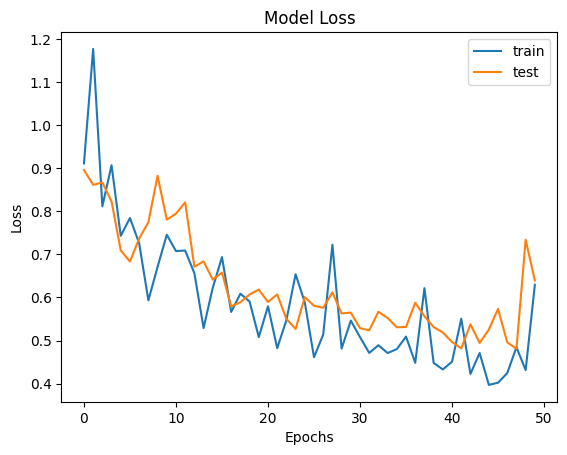

In [23]:
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()


The loss plot shows how the training and validation loss change over the epochs. A decreasing loss generally indicates the model is learning. If the validation loss increases while the training loss decreases, it might indicate overfitting.

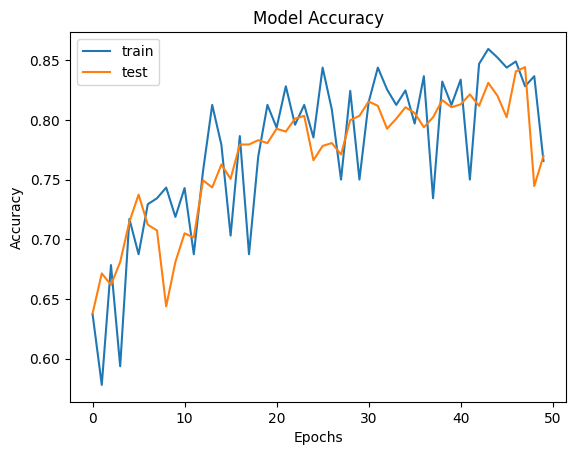

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

The accuracy plot shows how the training and validation accuracy change over the epochs. A steady increase in accuracy indicates the model is improving. If the validation accuracy remains stable or drops while the training accuracy increases, this might indicate overfitting.

# Interpretation


From the learning curves, we can assess the following:

Consistent Loss Decrease: The loss consistently decreases for both training and validation, suggesting the model is learning effectively.

Steady Increase in Accuracy: The accuracy increases over the epochs, indicating improved classification performance.

No Obvious Overfitting: The training and validation curves follow similar trends, suggesting the model generalizes well to unseen data.

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step
Predicted: Dandelion Actual: Dandelion
Predicted: Dandelion Actual: Dandelion
Predicted: Rose Actual: Rose
Predicted: Dandelion Actual: Dandelion


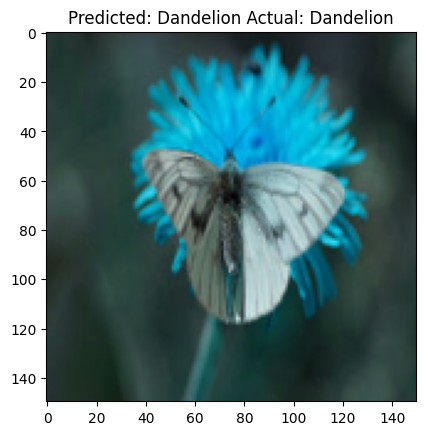

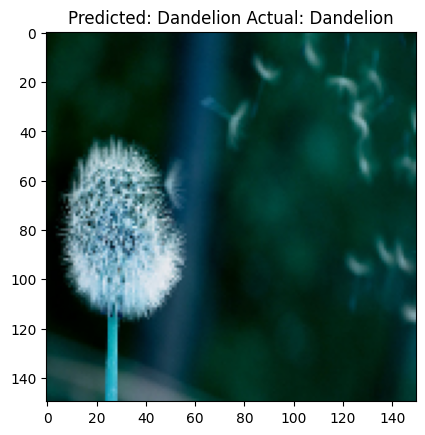

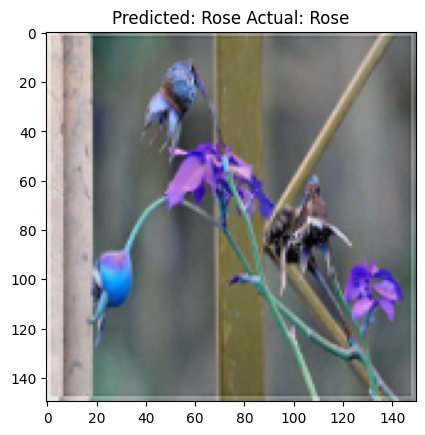

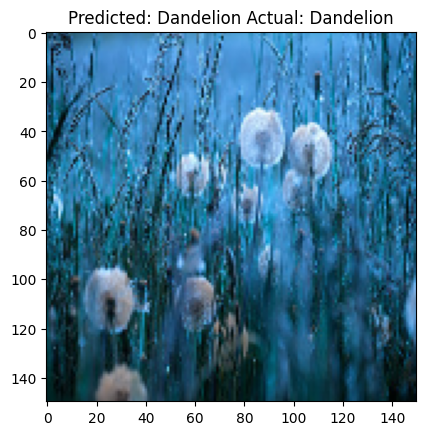

In [30]:
# Assuming you have imported necessary libraries and defined model architecture and compiled it

# Define a dictionary to map class indices to class names
class_names = {0: 'Daisy', 1: 'Dandelion', 2: 'Rose', 3: 'Sunflower', 4: 'Tulip'}

# Predict on test images
predictions = model.predict(x_test)

# You can then evaluate the predictions, for example, by printing the predicted labels for the first 5 test images
for i in range(4):
    predicted_label = np.argmax(predictions[i+3])
    actual_label = np.argmax(y_test[i+3])
    print("Predicted:", class_names[predicted_label], "Actual:", class_names[actual_label])

# If you have images corresponding to these test data, you can also display them alongside predictions
for i in range(4):
    plt.imshow(x_test[i+3])
    predicted_label = np.argmax(predictions[i+3])
    actual_label = np.argmax(y_test[i+3])
    plt.title("Predicted: {} Actual: {}".format(class_names[predicted_label], class_names[actual_label]))
    plt.show()
